# sklearn quick start

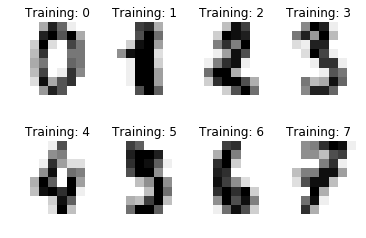

In [21]:
# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:8]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 4, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))
    
# 顯示圖形
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Shape of reduced_data_pca: (1797, 2)
---
RPCA:
[[ -1.25626557  21.31449033]
 [  7.95705065 -20.73960268]
 [  7.00217697  -9.87986983]
 ..., 
 [ 10.8025032   -7.04335608]
 [ -4.89763598  12.31883381]
 [ -0.35253572   6.21995218]]
---
PCA:
[[ -1.25946584  21.27488391]
 [  7.95761442 -20.7686985 ]
 [  6.99192052  -9.95598684]
 ..., 
 [ 10.80128119  -6.96025148]
 [ -4.87209677  12.42395194]
 [ -0.34439393   6.36554893]]


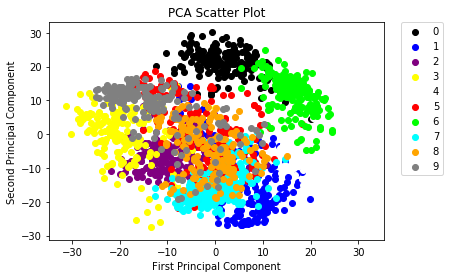

In [30]:
from sklearn import decomposition
# Principle Component Analytics PCA
# Given a dataset with high dimension, PCA can help us drop the trivial attributes, and save the ones that matters

# Create a Randomized PCA model that takes two components
randomized_pca = decomposition.RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = decomposition.PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")

# Print out the data
print("RPCA:")
print(reduced_data_rpca)
print("---")
print("PCA:")
print(reduced_data_pca)

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()
